# 1. Случайная величина X имеет нормальное распределение, M[X] = 10 и D[X] = 4.

In [34]:
import matplotlib.pyplot as plt
from scipy.stats import norm, expon
import numpy as np

mu = 10
d = 4
sigma = np.sqrt(d)



#### Построить функцию и плотность распределения для нормированной нормально распределенной случайной величины

In [35]:
z = np.linspace(-5, 5, 1000) # 1000 точек от -5 до 5
pdf_z = norm.pdf(z) # Плотность для Z ~ N(0,1)
cdf_z = norm.cdf(z) # Функция распределения для Z ~ N(0,1)

#### Построить функцию и плотность распределения для X

In [36]:
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
pdf_x = norm.pdf(x, mu, sigma) # Плотность для X ~ N(10, 4) 1 / (σ * √(2π)) * e^(-(x-μ)² / (2σ²))
cdf_x = norm.cdf(x, mu, sigma) # Функция распределения для X ∫[-∞, x] pdf(t) dt

#### Вычислить вероятности P(X < 11), P(X > 5), P(4 < X < 12)

In [37]:
P1 = norm.cdf(11, mu, sigma) # P(X < 11) - вероятность того, что X меньше 11
P2 = 1 - norm.cdf(5, mu, sigma) # P(X > 5) - вероятность того, что X больше 5
P3 = norm.cdf(12, mu, sigma) - norm.cdf(4, mu, sigma) # P(4 < X < 12) - вероятность попадания в интервал

# Вывод результатов с округлением до 4 знаков после запятой
print(f"P(X < 11) = {P1:.4f}")
print(f"P(X > 5) = {P2:.4f}")
print(f"P(4 < X < 12) = {P3:.4f}")

P(X < 11) = 0.6915
P(X > 5) = 0.9938
P(4 < X < 12) = 0.8400


#### Проверить правило 3 сигм

In [38]:
left_3sigma = mu - 3*sigma # левая граница: 10 - 3*2 = 4
right_3sigma = mu + 3*sigma # правая граница: 10 + 3*2 = 16
P_3sigma = norm.cdf(right_3sigma, mu, sigma) - norm.cdf(left_3sigma, mu, sigma) # P(4 < X < 16)
print(f"Правило 3 сигм: {P_3sigma  }") # Должно быть около 0.9973 (99.73%)

Правило 3 сигм: 0.9973002039367398


#### Построение графиков

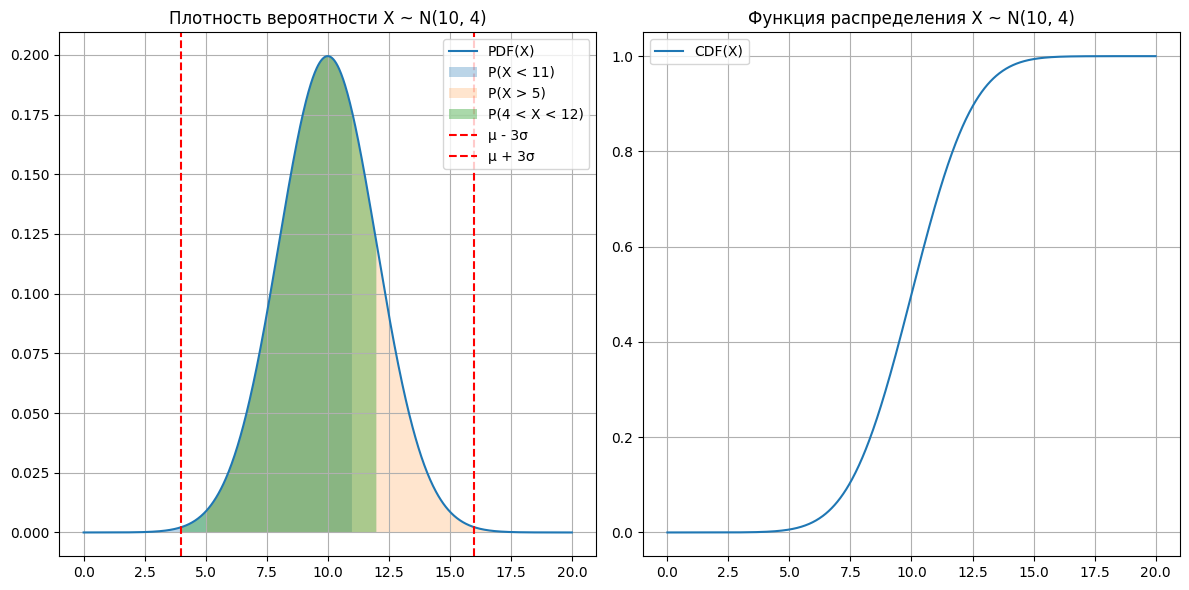

In [39]:
# Создаем фигуру для графиков размером 12x6 дюймов
plt.figure(figsize=(12, 6))

# Левый график - плотность вероятности (PDF)
plt.subplot(1, 2, 1)  # Создаем первый график в сетке 1x2
plt.title(f"Плотность вероятности X ~ N({mu}, {d})")  # Заголовок с параметрами распределения
plt.plot(x, pdf_x, label="PDF(X)")  # Строим кривую плотности вероятности

# Закрашиваем области под кривой для визуализации вероятностей:
plt.fill_between(x, pdf_x, where=(x<11), alpha=0.3, label="P(X < 11)")  # Заливка для P(X < 11) с прозрачностью 30%
plt.fill_between(x, pdf_x, where=(x>5), alpha=0.2, label="P(X > 5)")    # Заливка для P(X > 5) с прозрачностью 20%
plt.fill_between(x, pdf_x, where=((x>4) & (x<12)), alpha=0.4, label="P(4 < X < 12)")  # Заливка для интервала с прозрачностью 40%

# Добавляем вертикальные линии для границ правила 3 сигм:
plt.axvline(left_3sigma, color='r', linestyle='--', label='μ - 3σ')   # Левая граница (красная пунктирная)
plt.axvline(right_3sigma, color='r', linestyle='--', label='μ + 3σ')  # Правая граница (красная пунктирная)

plt.legend()  # Отображаем легенду с подписями всех элементов
plt.grid()    # Включаем сетку для удобства чтения графика

# Правый график - функция распределения (CDF)
plt.subplot(1, 2, 2)  # Создаем второй график в сетке 1x2
plt.title(f"Функция распределения X ~ N({mu}, {d})")  # Заголовок с параметрами распределения
plt.plot(x, cdf_x, label="CDF(X)")  # Строим кривую функции распределения
plt.legend()  # Отображаем легенду
plt.grid()    # Включаем сетку

plt.tight_layout()  # Автоматически настраиваем расстояния между графиками для красивого отображения
plt.show()  # Отображаем все созданные графики

# 2. Случайная величина Y имеет экспоненциальное распределение, M[Y] = 2.

In [40]:
mu_exp = 2  # Математическое ожидание M[Y] = 2
lamb_exp = 1 / mu_exp  # Параметр λ (интенсивность) = 1/μ = 0.5

#### Плотность и функция распределения

In [41]:
y = np.linspace(0, 10, 1000)
pdf_y = expon.pdf(y, scale= mu_exp)
cdf_y = expon.cdf(y, scale= mu_exp)

#### Вычислить вероятности

In [42]:
P4 = expon.cdf(3, scale = mu_exp)  # P(Y < 3) - вероятность того, что Y меньше 3
P5 = 1 - expon.cdf(2, scale = mu_exp) # P(Y > 2) - вероятность того, что Y больше 2
P6 = expon.cdf(2.5, scale=mu_exp) - expon.cdf(1, scale=mu_exp) # P(1 < Y < 2.5) - вероятность попадания в интервал

print(f"P(Y < 3) = {P4:.4f}")
print(f"P(Y > 2) = {P5:.4f}")
print(f"P(1 < Y < 2.5) = {P6:.4f}")

P(Y < 3) = 0.7769
P(Y > 2) = 0.3679
P(1 < Y < 2.5) = 0.3200


#### Проверит правило 3 сигм

In [43]:
sigma_y = mu_exp # Для экспоненциального распределения σ = μ
left_3sigma_y = mu_exp - 3*sigma_y # Левая граница: 2 - 3*2 = -4
right_3sigma_y = mu_exp + 3*sigma_y # Правая граница: 2 + 3*2 = 8
P_3sigma_exp = expon.cdf(right_3sigma_y, scale=mu_exp) - expon.cdf(left_3sigma_y, scale=mu_exp) # Вычисление "вероятности" в интервале [μ-3σ, μ+3σ]
print(f"Правило 3 сигм: {P_3sigma_exp}") 

Правило 3 сигм: 0.9816843611112658


#### Построение графиков

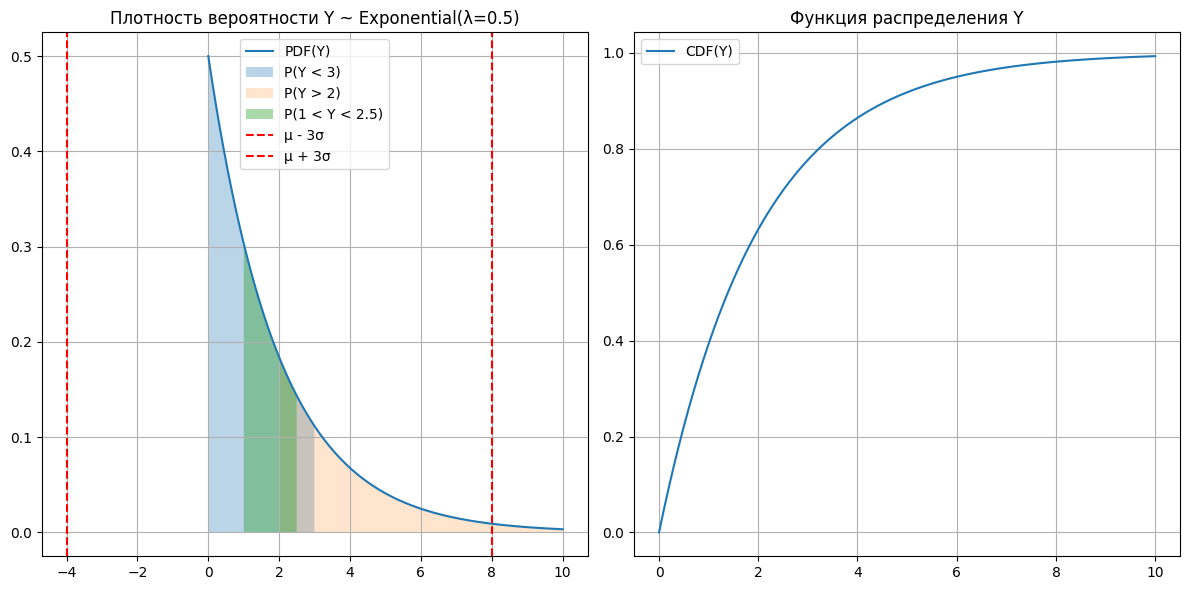

In [44]:
# Создаем фигуру для графиков размером 12x6 дюймов
plt.figure(figsize=(12, 6))

# Левый график - плотность вероятности (PDF) экспоненциального распределения
plt.subplot(1, 2, 1)  # Создаем первый график в сетке 1x2
plt.title(f"Плотность вероятности Y ~ Exponential(λ={lamb_exp})")  # Заголовок с параметром λ
plt.plot(y, pdf_y, label="PDF(Y)")  # Строим кривую плотности вероятности

# Закрашиваем области под кривой для визуализации вероятностей:
plt.fill_between(y, pdf_y, where=(y<3), alpha=0.3, label="P(Y < 3)")  # Заливка для P(Y < 3) с прозрачностью 30%
plt.fill_between(y, pdf_y, where=(y>2), alpha=0.2, label="P(Y > 2)")  # Заливка для P(Y > 2) с прозрачностью 20%
plt.fill_between(y, pdf_y, where=((y>1) & (y<2.5)), alpha=0.4, label="P(1 < Y < 2.5)")  # Заливка для интервала с прозрачностью 40%

# Добавляем вертикальные линии для "границ правила 3 сигм":
plt.axvline(left_3sigma_y, color='r', linestyle='--', label='μ - 3σ')   # Левая граница = -4
plt.axvline(right_3sigma_y, color='r', linestyle='--', label='μ + 3σ')  # Правая граница = 8

plt.legend()  # Отображаем легенду с подписями всех элементов
plt.grid()    # Включаем сетку для удобства чтения графика

# Правый график - функция распределения (CDF) экспоненциального распределения
plt.subplot(1, 2, 2)  # Создаем второй график в сетке 1x2
plt.title("Функция распределения Y")  # Заголовок
plt.plot(y, cdf_y, label="CDF(Y)")  # Строим кривую функции распределения
plt.legend()  # Отображаем легенду
plt.grid()    # Включаем сетку

plt.tight_layout()  # Автоматически настраиваем расстояния между графиками для красивого отображения
plt.show()  # Отображаем все созданные графики